<a href="https://colab.research.google.com/github/Nurulhasanah2/DataPreprocessing/blob/main/Preprocessing_Kelompok_Datmin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## INPUT DATA

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_excel("titanic_data.xlsx")
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
884,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
885,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
886,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
887,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
data.info()
#informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     889 non-null    int64  
 1   pclass       889 non-null    int64  
 2   sex          889 non-null    object 
 3   age          713 non-null    float64
 4   sibsp        889 non-null    int64  
 5   parch        889 non-null    int64  
 6   fare         889 non-null    float64
 7   embarked     887 non-null    object 
 8   class        889 non-null    object 
 9   who          889 non-null    object 
 10  adult_male   889 non-null    bool   
 11  embark_town  887 non-null    object 
 12  alive        889 non-null    object 
 13  alone        889 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(6)
memory usage: 85.2+ KB


pada data yang masih mentah, terdapat 889 baris dan 14 kolom data, kemudian kami melakukan drop kolom yang tidak dipakai untuk analisis lanjut

In [ ]:
data = data.drop(["sex", "who", "adult_male","embark_town", "alive", "alone", "parch"], axis=1)

## Missing Value

In [ ]:
data.isnull()

,survived,pclass,age,sibsp,fare,embarked,class
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
884,False,False,False,False,False,False,False
885,False,False,False,False,False,False,False
886,False,False,True,False,False,False,False
887,False,False,False,False,False,False,False


In [ ]:
data.isna().sum()

survived      0
pclass        0
age         176
sibsp         0
fare          0
embarked      2
class         0
dtype: int64

 Interpretasi ada 176 missing values pada variabel age dan 2 missing value pada variabel embarked. Sehingga harus dilakukan penanganan data missing value 

## Penanganan Missing Values

Untuk mengatasi missing values pada variabel age dapat dilakukan imputasi dengan nilai mean 

In [ ]:
import math
data['age'].fillna(math.floor(data['age'].mean()),inplace=True)
print(data.isna().sum())

survived    0
pclass      0
age         0
sibsp       0
fare        0
embarked    2
class       0
dtype: int64


In [ ]:
df = data.dropna(axis=0)
df

,survived,pclass,age,sibsp,fare,embarked,class
0,0,3,22.0,1,7.2500,S,Third
1,1,1,38.0,1,71.2833,C,First
2,1,3,26.0,0,7.9250,S,Third
3,1,1,35.0,1,53.1000,S,First
4,0,3,35.0,0,8.0500,S,Third
...,...,...,...,...,...,...,...
884,0,2,27.0,0,13.0000,S,Second
885,1,1,19.0,0,30.0000,S,First
886,0,3,29.0,1,23.4500,S,Third
887,1,1,26.0,0,30.0000,C,First


## Outlier (data nominal)

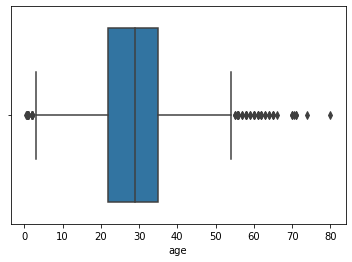

In [ ]:
#boxlplot kolom age
# Creating Box Plot
import matplotlib.pyplot as plt
import seaborn as sns
# Masukkan variable age
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['age'])
plt.show()

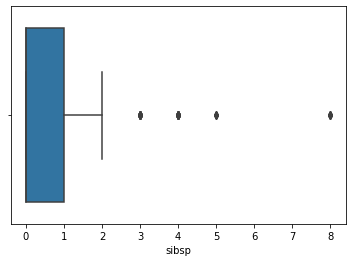

In [ ]:
# Masukkan variable sibsp
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['sibsp'])
plt.show()

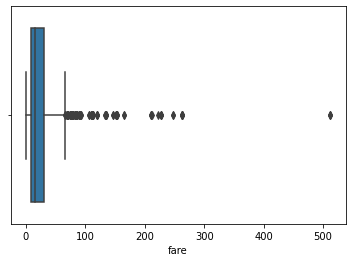

In [ ]:
# Masukkan variable fare
plt.figure() # untuk membuat figure baru
sns.boxplot(x=df['fare'])
plt.show()

Berdasarkan boxplot diatas, secara visual terdapat outlier dalam data

kita dapat mengecek terlebih dahulu apakah data outliers merupakan data sejati ( data yang sebenarnya ) atau bukan

In [ ]:
print( "Max age :",df["age"].max())
print( "Max sibsp :",df["sibsp"].max())
print( "Max fare :",df["fare"].max(), ", Min fare :", df["fare"].min())

Max age : 80.0
Max sibsp : 8
Max fare : 512.3292 , Min fare : 0.0


dilakukan penaganan dengan melakukan imputasi pada data outliers yaitu mengubah data outliers menjadi data median

In [ ]:
#identifikasi outlier dan ubah ke null
for i in ['fare']:
  Q1,Q3 = np.percentile(df.loc[:,i],[25,75])
  IQR = Q3 - Q1
  upper = Q3+(1.5*IQR)
  lower = Q1-(1.5*IQR)
  df.loc[df[i] < lower,i] = np.nan
  df.loc[df[i] > upper,i] = np.nan

#imputasi outlier dengan median
columnc=['fare']
for i in columnc:
  df.loc[df.loc[:,i].isnull(),i]=df.loc[:,i].median()

print(df.isnull().sum())
print(df.shape)
df

survived    0
pclass      0
age         0
sibsp       0
fare        0
embarked    0
class       0
dtype: int64
(887, 7)


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,survived,pclass,age,sibsp,fare,embarked,class
0,0,3,22.0,1,7.250,S,Third
1,1,1,38.0,1,13.000,C,First
2,1,3,26.0,0,7.925,S,Third
3,1,1,35.0,1,53.100,S,First
4,0,3,35.0,0,8.050,S,Third
...,...,...,...,...,...,...,...
884,0,2,27.0,0,13.000,S,Second
885,1,1,19.0,0,30.000,S,First
886,0,3,29.0,1,23.450,S,Third
887,1,1,26.0,0,30.000,C,First


setelah dilakukan penanganan dengan imputasi pada outliers didapatkan data sebanyak 887 baris dan 7 kolom

setelah itu, dilakukan encoding data kategorikal ke numerikal

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['embarked'] = labelencoder.fit_transform(df['embarked'])
df['class'] = labelencoder.fit_transform(df['class'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
print(data)

     survived  pclass   age  sibsp     fare embarked   class
0           0       3  22.0      1   7.2500        S   Third
1           1       1  38.0      1  71.2833        C   First
2           1       3  26.0      0   7.9250        S   Third
3           1       1  35.0      1  53.1000        S   First
4           0       3  35.0      0   8.0500        S   Third
..        ...     ...   ...    ...      ...      ...     ...
884         0       2  27.0      0  13.0000        S  Second
885         1       1  19.0      0  30.0000        S   First
886         0       3  29.0      1  23.4500        S   Third
887         1       1  26.0      0  30.0000        C   First
888         0       3  32.0      0   7.7500        Q   Third

[889 rows x 7 columns]
